In [4]:
from numpy import array, where
from random import choice

a=[1,1,1,1,1,0,0,0,1,1,1,0]

choice(array(where(a == 1)))

/tmp/ipykernel_1736549/2311647406.py:6: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  choice(array(where(a == 1)))


array([], dtype=int64)

In [140]:
import pandas as pd
df = pd.read_csv('../data/hate/eng_dev_file_with_probs.csv')
# df_pos = df[df['prediction']==2]
df_hate  = df[df['prediction']==1]
df_non_hate = df[df['prediction']==0]

# df_pos.to_csv('../data/checklist/checklist_some_types_500/checklist_some_types_500_pos.csv',index=False)
df_hate.to_csv('../data/hate/hate/dev_hate.csv',index=False)
df_non_hate.to_csv('../data/hate/non-hate/dev_non_hate.csv',index=False)

In [98]:
df_neg

Text  \
34                                                awful   
35                                                  bad   
36                                             horrible   
39                                                lousy   
40                                              unhappy   
...                                                 ...   
15035  Do I think that customer service is American? No   
15040               Did I find the customer service? No   
15048     Do I think that was an Israeli cabin crew? No   
15077        Do I think this was an Israeli company? No   
15079          Do I think that is an Israeli flight? No   

                  test_suite test_type  prediction  \
34     single negative words       MFT           0   
35     single negative words       MFT           0   
36     single negative words       MFT           0   
39     single negative words       MFT           0   
40     single negative words       MFT           0   
...                      ...       ...         ...   
15035    Q & A: no (neutral)       MFT           0   
15040    Q & A: no (neutral)       MFT           0   
15048    Q & A: no (neutral)       MFT           0   
15077    Q & A: no (neutral)       MFT           0   
15079    Q & A: no (neutral)       MFT           0   

                                           probabilities  
34     [0.8227286338806152, 0.14565710723400116, 0.03...  
35     [0.43132394552230835, 0.400374174118042, 0.168...  
36     [0.7492193579673767, 0.19050060212612152, 0.06...  
39     [0.5993399024009705, 0.3143533170223236, 0.086...  
40     [0.6304473876953125, 0.2963673174381256, 0.073...  
...                                                  ...  
15035  [0.6383101344108582, 0.32034561038017273, 0.04...  
15040  [0.5402883291244507, 0.4227564334869385, 0.036...  
15048  [0.5108563303947449, 0.4632282853126526, 0.025...  
15077  [0.5585074424743652, 0.4218301475048065, 0.019...  
15079  [0.4895603656768799, 0.4831230640411377, 0.027...  

[7399 rows x 5 columns]

In [15]:
import json
from tqdm import tqdm

In [40]:
for _, row in tqdm(enumerate(data)):
    pred_label = row['meta']['samples'][0][4][0]
    if(pred_label==0):
        
#     if(pred_label==1):
#         with open('../data/rotten_tomatoes/data_new/arms_MLM_bert_base_uncased_validation_pred_ppls_pos.json','a') as f1:
#             json.dump(row, f1)
#     elif(pred_label==0):
#         with open('../data/rotten_tomatoes/data_new/arms_MLM_bert_base_uncased_validation_pred_ppls_neg.json','a') as f2:
#             json.dump(row, f2)

3162it [00:00, 67605.23it/s]

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [ ]:
data = [eval(line) for line in open('../data/rotten_tomatoes/data_new/arms_MLM_bert_base_uncased_validation_pred_ppls_pos.json','r')]

In [ ]:
len(data)

In [34]:
def csv_to_json(ip_json_file, op_json_file, csv_file):
    
    data_reward = [eval(lines) for lines in open(ip_json_file, "r")]
    df = pd.read_csv(csv_file)
    new_arms = []
    
    with open(op_json_file, 'w') as file:
        
        for i in tqdm(range(len(data_reward))):

            try:
                arm = data_reward[i]['meta']['word']

                # Samples is the list of edges
                samples = data_reward[i]['meta']['samples']
                samples_new = []
                
                for sample in samples:
                    example_no = sample[0]
                    replacement_words = sample[1]
                    sentences = sample[2]
                    mlm_scores = sample[3]

                    new_samples = []

                    # Find in the dataframe df with arm - multiple edges 
                    armmatch_df = df[(df['arm'] == arm)]


                    if len(armmatch_df) == 0:
                        new_arms.append(data_reward[i]) # Keep as before 
                        continue

                    armmatch_df = armmatch_df.reset_index(drop=True)

                    #print("Before Adding column",armmatch_df)
                    probs = armmatch_df['probabilities'].tolist()
                    preds = armmatch_df["prediction"].tolist()

                    new_probs = []
                    new_preds = []
                    bool_original = armmatch_df["bool_original"].tolist()


                    for j in range(len(replacement_words)):
                        index_of_value = armmatch_df.index[armmatch_df['new_word'] == replacement_words[j]].tolist()
                        new_preds.append(preds[index_of_value[0]])
                        new_probs.append(probs[index_of_value[0]])

                    orig_ind = (armmatch_df.index[armmatch_df['bool_original'] == 1].tolist())[0]
                    orig_pred = preds[orig_ind]
                    orig_prob = probs[orig_ind]

                    pred_list = [orig_pred]
                    pred_list.append(new_preds)

                    prob_list = [orig_prob]
                    prob_list.append(new_probs)

                    sample.append(pred_list) 
                    sample.append(prob_list)
                    samples_new.append(sample)

                data_reward[i]['meta']['samples'] = samples_new
                new_arms.append(data_reward[i])
                s = str(data_reward[i])
                file.write(s)
                file.write('\n')
            except:
                continue

In [35]:
ip_json_file='../data/rotten_tomatoes/data_val/pos/arms_MLM_bert_base_uncased_val_pos.json'
op_json_file='../data/rotten_tomatoes/data_val/pos/arms_MLM_bert_base_uncased_val_pos_preds.json'
csv_file='../data/rotten_tomatoes/data_val/pos/temp_preds.csv'

In [36]:
csv_to_json(ip_json_file, op_json_file, csv_file)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3162/3162 [00:18<00:00, 166.57it/s]


In [37]:
data = [eval(line) for line in open('../data/rotten_tomatoes/data_val/pos/arms_MLM_bert_base_uncased_val_pos_preds.json','r')]

In [39]:
data[-1]

{'id': 3162,
 'meta': {'word': 'film',
  'sentence_ids': [35,
   215,
   182,
   3,
   275,
   323,
   494,
   150,
   265,
   479,
   72,
   472,
   147,
   501,
   158,
   454,
   214,
   284,
   237,
   459],
  'samples': [[35,
    ['movie',
     'film',
     'series',
     'album',
     'tour',
     'movies',
     'show',
     'special',
     'hit',
     'musical'],
    ["the best comedy concert movie i've seen since cho's previous concert comedy movie, i'm the one that i want, in 2000.",
     "the best comedy concert movie i've seen since cho's previous concert comedy film, i'm the one that i want, in 2000.",
     "the best comedy concert movie i've seen since cho's previous concert comedy series, i'm the one that i want, in 2000.",
     "the best comedy concert movie i've seen since cho's previous concert comedy album, i'm the one that i want, in 2000.",
     "the best comedy concert movie i've seen since cho's previous concert comedy tour, i'm the one that i want, in 2000.",
   

In [50]:
import nltk

In [51]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/debrupdas/nltk_data...


True

In [52]:
# initialize NLTK sentiment analyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# create get_sentiment function
def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    sentiment = 1 if scores['pos'] > 0 else 0
    return sentiment

In [56]:
get_sentiment('rotten')

0

In [58]:
data = [eval(line) for line in open('../data/rotten_tomatoes/data_val/neg/arms_hashmap.json','r')]

In [60]:
pos_words = []
neg_words = []
for sample in data:
    word = sample['meta']['word']
    sent = get_sentiment(word)
    if(sent==1):
        pos_words.append(word)
    else:
        neg_words.append(word)
        

In [61]:
len(pos_words)

260

In [62]:
len(neg_words)

2772

In [94]:
# data = json.load(open('../experiments_new/thompson_0.5_eg_binary_rt_neg_200k/global_sensitivity_finalvalues.json','r'))
data = [eval(line) for line in open('../experiments_new/thompson_0.5_eg_0.9_binary_rt_pos_200k/global_sensitivity_finalvalues.json','r')]

In [96]:
for key, value in data[0].items():
    if(value>0.9):
        print(key, value)

clear 0.9994593087086171
oodles 0.9994742028547557
reading 0.9968143956986786
insightful 0.9996442168554698
eerily 0.9890538538155663
rises 0.9996737507936897
deftly 0.9993025730926117
trimmed 0.9832793877047047
perceptive 0.9802800163825924
tells 0.9992735365502063
haunting 0.9973124188869378
lesser 0.9995256248681358
disgrace 0.9655741261685287
astounds 0.999621061145234
wrapping 0.9993549104480657
improves 0.9995785339762449
wryly 0.9728453195600225
unusually 0.9690381155371001
stops 0.9989450307928701
tradition 0.9998086919954332
sobering 0.9931871889482468
pathos 0.9989534239527137
humbling 0.9842470087507447
sort 0.9997282673362741
stronger 0.9998487017699285
maintains 0.9996633606195269
mournful 0.9982651449309365
pleasures 0.9749994578676635
chills 0.9962833484745882
levels 0.9998465547525046
copious 0.9605179726918017
pretensions 0.999786249547844
energizes 0.9107882842237336
richly 0.9989360132693819
oozes 0.9933473238699801
complaint 0.999153421308074
moves 0.999419685724132

In [93]:
import random
idx = random.randrange(start = 0, stop = 10)

0

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_histogram_and_save(array):
    #print(working_dir)
    
    array_updated = []
    array = array.reshape(-1,1)
#     for i in range(len(array)):
#         if(count[i]>1):
#             array_updated.append(array[i])
            
    #array = np.array(array_updated)
            

    # Check if the input is a numpy array
    if not isinstance(array, np.ndarray):
        raise ValueError("Input must be a NumPy array.")

    # Check if values are between 0 and 1
    if np.any((array < 0) | (array > 1)):
        raise ValueError("Values in the array must be between 0 and 1.")

    bin_edges = np.arange(0, 1.1, 0.1)

    # Use numpy.histogram to compute the histogram
    hist, _ = np.histogram(array, bins=bin_edges)    
    values = hist.tolist()
    #print(values)

    # Example data: list of values belonging to 10 categories
    categories = ['0.0', '0.1', '0.2', '0.3', '0.4',
                '0.5', '0.6', '0.7', '0.8', '0.9']


    # Define colors for each category
    colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'pink', 'brown', 'gray', 'cyan']

    # Create a bar plot
    ax = sns.barplot(x=categories, y=values)
    #ax.set_xlim(-0.5, 2.5)  # Adjust based on your data and desired range

    # Set y-axis limit (e.g., limiting from 0 to 60)
    ax.set_ylim(0, 1800)

    # Set labels and title
    plt.xlabel('Sensitivity category')
    plt.ylabel('No of Arms')
    plt.title('Global Sensitivity')
    plt.show()
    # Save the plot
    #plt.savefig(working_dir + setting + f'histplots/histogram_plot_gs_{curr_iter}.png')

    # Show the plot (optional)
#     plt.clf()
#     plt.close()

In [197]:
data = [eval(line) for line in open('../experiments_new/thompson_0.5_eg_0.9_binary_cl_neu_200k/regret_count_tuple.json','r')]

keys = []
for key, value in data[0].items():
    keys.append(key)

In [198]:
# data = json.load(open('../experiments_new/thompson_0.5_eg_binary_rt_neg_200k/global_sensitivity_finalvalues.json','r'))
data = [eval(line) for line in open('../experiments_new/thompson_0.5_eg_0.9_binary_cl_neu_200k/global_sensitivity_finalvalues.json','r')]

values = []
for key, value in data[0].items():
    if key in keys:
        values.append(value)

In [199]:
len(values)

1105

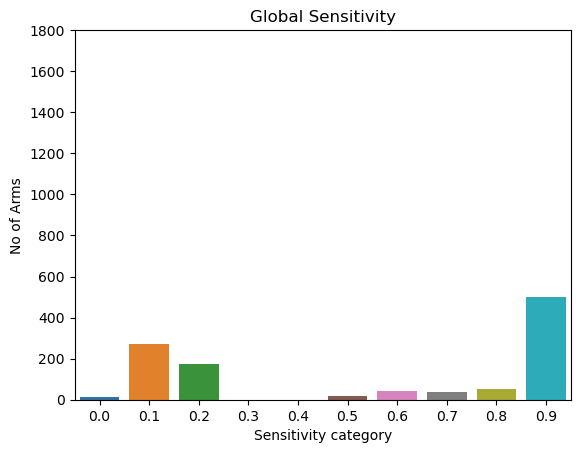

In [200]:
plot_histogram_and_save(np.array(values))

In [150]:
data = [eval(line) for line in open('../experiments_new/thompson_0.5_eg_0.9_binary_rt_200k/regret_count_tuple.json','r')]

[{'#ows': [[2, 0.19418156057101457]],
  'months': [[2, 0.20850406479188602]],
  'designated': [[2, 0.1933323631839315]],
  'treatment': [[2, 0.17977951186224075]],
  'meanwhile': [[2, 0.22575446751212144]],
  'reminder': [[2, 0.24780025471016073]],
  'airport': [[2, 0.21876741727200524]],
  'homosexual': [[2, 0.2281452050413547]],
  'bolshevik': [[2, 0.22545820986693813]],
  'racists': [[2, 0.7492785275377097],
   [3, 0.8328523516918066],
   [4, 0.8746392637688549],
   [5, 0.8997114110150839],
   [6, 0.9164261758459032],
   [7, 0.9283652935822028],
   [8, 0.9373196318844275],
   [9, 0.9442841172306022],
   [10, 0.949855705507542],
   [11, 0.954414277734129],
   [12, 0.9582130879229517],
   [13, 0.9614274657750322],
   [14, 0.9641826467911014],
   [15, 0.9665704703383613],
   [16, 0.9686598159422137],
   [17, 0.970503356180907],
   [18, 0.9721420586153011],
   [19, 0.973608266056601],
   [20, 0.974927852753771],
   [21, 0.976121764527401],
   [22, 0.9772071388670646],
   [23, 0.97819813

In [158]:
len(keys)

2813

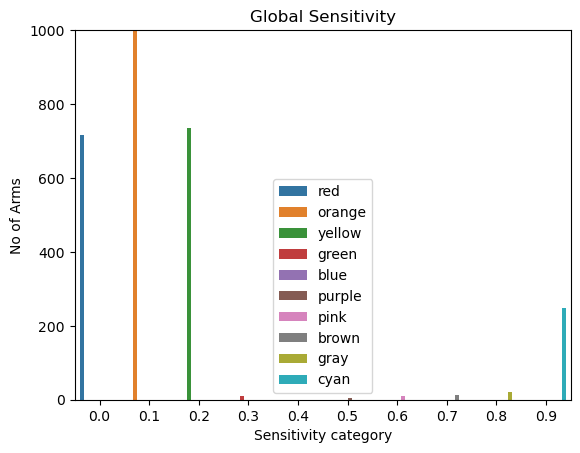

In [113]:
plot_histogram_and_save(np.array(values))

In [205]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))

def remove_stopwords(example_sent):
 
    stop_words = set(stopwords.words('english'))

    word_tokens = word_tokenize(example_sent.lower())
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
    filtered_sentence = []

    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence.append(w)
    
    return filtered_sentence

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - '/home/debrupdas/nltk_data'
    - '/home/debrupdas/anaconda3/nltk_data'
    - '/home/debrupdas/anaconda3/share/nltk_data'
    - '/home/debrupdas/anaconda3/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [202]:
remove_stopwords("The flight is good")

NameError: name 'stopwords' is not defined

In [206]:
import pandas as pd

In [226]:
df = pd.read_csv('../data/checklist/checklist_all_types_1000/checklist_all_types_1000.csv')

In [227]:
df1 = df[df['test_type']=='INV']
df2 = df[df['test_type']=='DIR']

In [229]:
0.10*len(df1)

1300.0

In [230]:
df1 = df1.sample(int(0.10*len(df1)))
df2 = df2.sample(int(0.10*len(df2)))

In [231]:
df_merged = df1._append(df2, ignore_index=True)

In [233]:
df_merged.to_csv('../data/checklist/checklist_all_types_1000/checklist_all_types_1000_test.csv')

In [234]:
class eng_mab_data:

    def __init__(self, df, arms, K):

        self.K = K
        self.df = df
        self.arms = arms
        self.hash_map = defaultdict(list)

        self.regex_digit = "\d"
        self.space_pattern = '\s+'
        self.giant_url_regex = ('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
        '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
        self.mention_regex = '@\s[\w\-]+'

        self.stop_words_list = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]
        # except "no", "nor", "not"

        self.alphabets = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
        self.prepare_edges()

    
    def only_punctuation(self, input_string):
        pattern = r'^[' + re.escape(string.punctuation) + r']+$'
        return bool(re.match(pattern, input_string))

    def check_word(self, W):

        if re.search(self.regex_digit, W) is None and not self.only_punctuation(W):
            # Strings/Words that don't contain any digit and are not composed of only punctuation symbol(s) will pass
            # Strings like "!@#$%^&" will not pass while strings like "sachin's" will pass although "sachin's" contain a punctuation symbol
            # Strings like "sac549hi6n" and "sachin4903" will not pass as they contain digits.

            return True
        else:
            return False

    def prepare_edges(self):
        
        if self.K == 1:
            for i in range(len(self.df)):
                sentence = self.df.iloc[i]['Text']
                parsed_text = re.sub(self.giant_url_regex, '', sentence)
                parsed_text = re.sub(self.mention_regex, '', parsed_text)
                parsed_text = re.sub(r"\b(RT|rt|fav|FAV)\b", '', parsed_text)
                parsed_text = re.sub(self.space_pattern, ' ', parsed_text)
                final_sent = tweet_tokenizer.tokenize(parsed_text)
                #print(final_sent)
                for elem in final_sent:
                    if "#" not in elem:
                        tokens = wordpunct_tokenize(elem)
                        #print(tokens)
                        for t in tokens:
                            if t in self.arms and t not in self.alphabets and t not in self.stop_words_list and self.check_word(t):
                                self.hash_map[t].append(i) # (original word, sentence id)
                    else:
                        if elem in self.arms and elem not in self.alphabets and elem not in self.stop_words_list and self.check_word(elem):
                                self.hash_map[elem].append(i) # (original word, sentence id)

            self.hash_map = dict(OrderedDict(sorted(self.hash_map.items(), key = lambda x : len(list(set(x[1]))))))
            print(len(self.hash_map))
            print("max length: ", len(list(self.hash_map.values())[-1])) 
            #self.create_dict()
        return self.hash_map

    def create_dict(self):
        dict_final = {}
        c = 0
        for k, v in self.hash_map.items():
            temp_dict = {}
            temp_dict['word'] = k
            temp_dict['sentence_ids'] = v
            dict_final['id'] = (c + 1)
            dict_final['meta'] = temp_dict
            c += 1
            #self.write_file(dict_final, "../data/rotten_tomatoes/eng_val_new_hash_map.json")

    def write_file(self, d, file_name):
        with open(file_name, "a") as fl:
            json.dump(d, fl)
            fl.write("\n")

In [ ]:
words_with_sent_ids = eng_mab_data(df_merged, global_sens_word_gt_thres, 1).hash_map

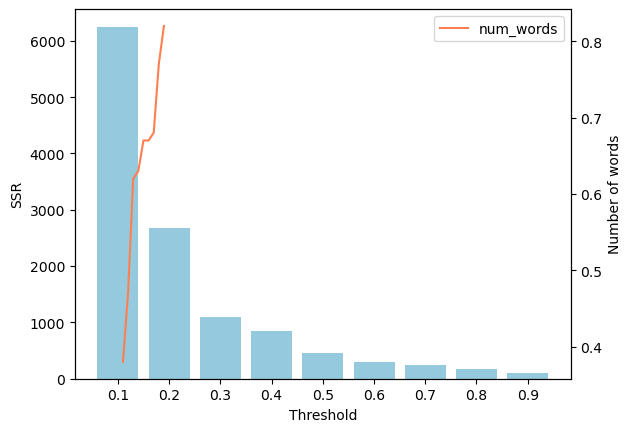

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
data = {
    'num_words': [6250,2684, 1094, 855, 464, 293, 240, 165, 104],
    'SSR': [0.38, 0.47, 0.62, 0.63, 0.67, 0.67, 0.68, 0.77, 0.82],
    'Threshold': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
}
df = pd.DataFrame(data)

# Creating the figure and primary axis
fig, ax1 = plt.subplots()
sns.barplot(x='Threshold', y='num_words', data=df, ax=ax1, color='skyblue', label='SSR')
ax1.set_ylabel('SSR')

ax2 = ax1.twinx()
sns.lineplot(x='Threshold', y='SSR', data=df, ax=ax2, color='coral', label='num_words')
ax2.set_ylabel('Number of words')

# fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

plt.show()

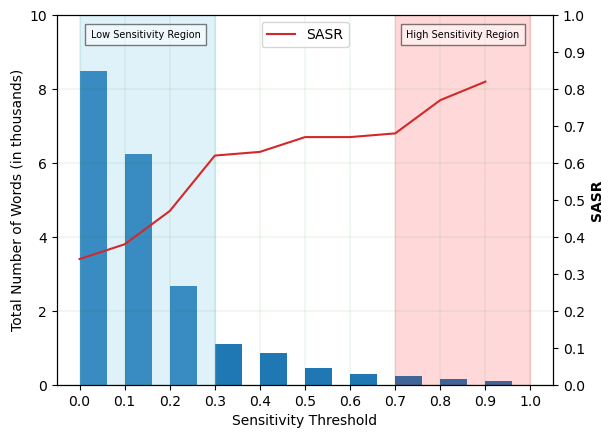

In [262]:
import matplotlib.pyplot as plt
#'num_words': [6250, 2684, 1094, 855, 464, 293, 240, 165, 104]
# Data
data = {
    'num_words': [8.49, 6.25, 2.684, 1.094, 0.855, 0.464, 0.293, 0.240, 0.165, 0.104],
    'SASR': [0.34, 0.38, 0.47, 0.62, 0.63, 0.67, 0.67, 0.68, 0.77, 0.82],
    'Threshold': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
}

# Plotting
fig, ax1 = plt.subplots()

# Plotting num_words as a bar plot on y-axis
ax1.set_xlabel('Sensitivity Threshold')
ax1.set_ylabel('Total Number of Words (in thousands)')
ax1.bar(data['Threshold'], data['num_words'], color='tab:blue', label='Total Number of Words', width=0.06, align="edge")
ax1.tick_params(axis='y')
ax1.set_ylim(0, 10)

# Creating another y-axis for SSR
ax2 = ax1.twinx()
ax2.set_ylabel('SASR',fontweight='bold')
#ax1.set_ylabel('Label', color='color', fontsize=size, fontweight='bold')
ax2.plot(data['Threshold'], data['SASR'], color='tab:red', label='SASR')
ax2.tick_params(axis='y')
ax2.set_ylim(0, 1.0)
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0))
ax2.yaxis.set_major_locator(plt.MultipleLocator(0.1))

# Showing the plot
ax1.grid(color='g', linestyle='-', linewidth=0.08)
ax1.axvspan(0.00, 0.30, color='skyblue', alpha=0.25)
ax1.axvspan(0.70, 1.0, color='red', alpha=0.15)
# ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 0.90))

plt.yticks([i/10 for i in range(0, 11, 1)])
plt.xticks([i/10 for i in range(0, 11, 1)])
plt.text(0.025, 0.94, 'Low Sensitivity Region', fontsize=7, bbox=dict(facecolor='white', alpha=0.5))
plt.text(0.725, 0.94, 'High Sensitivity Region', fontsize=7, bbox=dict(facecolor='white', alpha=0.5))
plt.show()

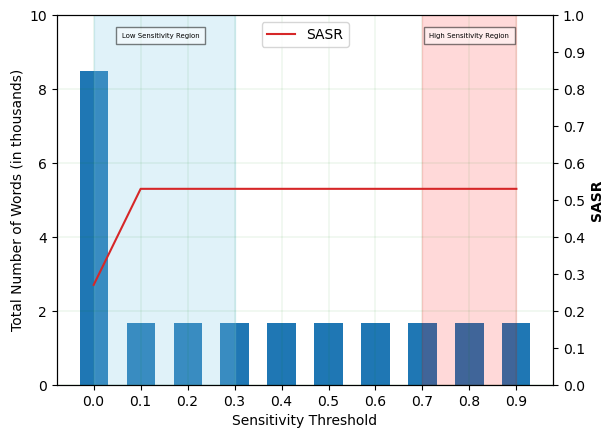

In [190]:
import matplotlib.pyplot as plt
#'num_words': [6250, 2684, 1094, 855, 464, 293, 240, 165, 104]
# Data
data = {
    'num_words': [8.49, 1.66, 1.66, 1.66, 1.66, 1.66, 1.66, 1.66, 1.66, 1.66],
    'SASR': [0.27, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53],
    'Threshold': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
}

# Plotting
fig, ax1 = plt.subplots()

# Plotting num_words as a bar plot on y-axis
ax1.set_xlabel('Sensitivity Threshold')
ax1.set_ylabel('Total Number of Words (in thousands)')
ax1.bar(data['Threshold'], data['num_words'], color='tab:blue', label='Total Number of Words', width=0.06)
ax1.tick_params(axis='y')
ax1.set_ylim(0, 10)

# Creating another y-axis for SSR
ax2 = ax1.twinx()
ax2.set_ylabel('SASR',fontweight='bold')
#ax1.set_ylabel('Label', color='color', fontsize=size, fontweight='bold')
ax2.plot(data['Threshold'], data['SASR'], color='tab:red', label='SASR')
ax2.tick_params(axis='y')
ax2.set_ylim(0, 1.0)
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0))
ax2.yaxis.set_major_locator(plt.MultipleLocator(0.1))

# Showing the plot
ax1.grid(color='g', linestyle='-', linewidth=0.08)
ax1.axvspan(0.00, 0.30, color='skyblue', alpha=0.25)
ax1.axvspan(0.70, 0.90, color='red', alpha=0.15)
# ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 0.90))

plt.xticks([i/10 for i in range(0, 10, 1)])
plt.text(0.06, 0.94, 'Low Sensitivity Region', fontsize=5, bbox=dict(facecolor='white', alpha=0.5))
plt.text(0.715, 0.94, 'High Sensitivity Region', fontsize=5, bbox=dict(facecolor='white', alpha=0.5))
plt.show()

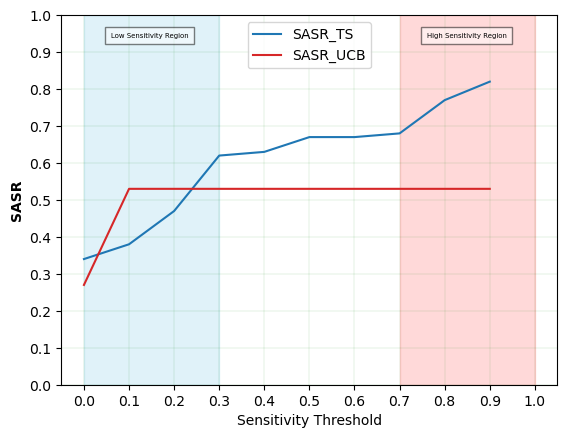

In [200]:
import matplotlib.pyplot as plt
#'num_words': [6250, 2684, 1094, 855, 464, 293, 240, 165, 104]
# Data
data = {
    'SASR_TS': [0.34, 0.38, 0.47, 0.62, 0.63, 0.67, 0.67, 0.68, 0.77, 0.82],
    'SASR_UCB': [0.27, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53],
    'Threshold': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
}

# Plotting
fig, ax1 = plt.subplots()

# Plotting num_words as a bar plot on y-axis
ax1.set_xlabel('Sensitivity Threshold')
ax1.set_ylabel('SASR', fontweight='bold')
ax1.plot(data['Threshold'], data['SASR_TS'], color='tab:blue', label='SASR_TS')
ax1.plot(data['Threshold'], data['SASR_UCB'], color='tab:red', label='SASR_UCB')
ax1.tick_params(axis='y')
ax1.set_ylim(0, 1.0)
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0))


ax2.set_ylabel('SASR',fontweight='bold')
#ax1.set_ylabel('Label', color='color', fontsize=size, fontweight='bold')
ax2.plot(data['Threshold'], data['SASR_UCB'], color='tab:red', label='SASR_UCB')
ax2.tick_params(axis='y')
ax2.set_ylim(0, 1.0)
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0))
ax2.yaxis.set_major_locator(plt.MultipleLocator(0.1))

# Showing the plot
ax1.grid(color='g', linestyle='-', linewidth=0.08)
ax1.axvspan(0.00, 0.30, color='skyblue', alpha=0.25)
ax1.axvspan(0.70, 1.0, color='red', alpha=0.15)
# ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 0.90))

plt.yticks([i/10 for i in range(0, 11, 1)])
plt.xticks([i/10 for i in range(0, 11, 1)])
plt.text(0.06, 0.94, 'Low Sensitivity Region', fontsize=5, bbox=dict(facecolor='white', alpha=0.5))
plt.text(0.76, 0.94, 'High Sensitivity Region', fontsize=5, bbox=dict(facecolor='white', alpha=0.5))
plt.show()

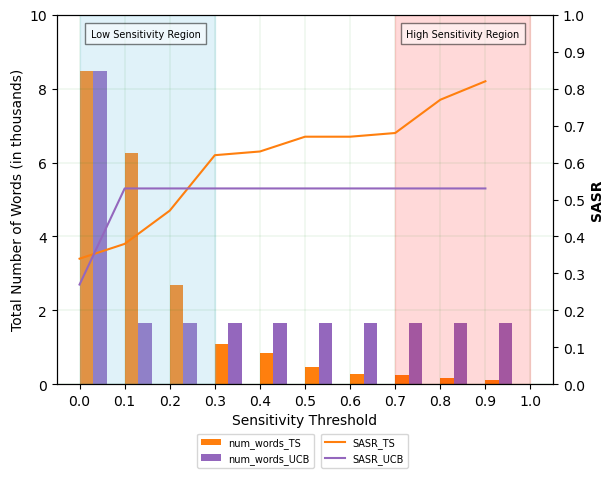

In [246]:
import matplotlib.pyplot as plt
import numpy as np
#'num_words': [6250, 2684, 1094, 855, 464, 293, 240, 165, 104]
# Data
data = {
    'SASR_TS': [0.34, 0.38, 0.47, 0.62, 0.63, 0.67, 0.67, 0.68, 0.77, 0.82],
    'num_words_TS': [8.49, 6.25, 2.684, 1.094, 0.855, 0.464, 0.293, 0.240, 0.165, 0.104],
    'SASR_UCB': [0.27, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53],
    'num_words_UCB': [8.49, 1.66, 1.66, 1.66, 1.66, 1.66, 1.66, 1.66, 1.66, 1.66],
    'Threshold': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
}

# Plotting
fig, ax1 = plt.subplots()

ax1.set_xlabel('Sensitivity Threshold')
ax1.set_ylabel('Total Number of Words (in thousands)')
ax1.bar(np.array(data['Threshold']), data['num_words_TS'], color='tab:orange', 
        label='num_words_TS', width=0.03, align="edge")
ax1.bar(np.array(data['Threshold'])+0.03, data['num_words_UCB'], color='tab:purple', 
        label='num_words_UCB', width=0.03, align="edge")
ax1.tick_params(axis='y')
ax1.set_ylim(0, 10)
ax1.legend(loc='upper center', fontsize=7, bbox_to_anchor=(0.40, -0.12))

ax2 = ax1.twinx()
ax2.set_ylabel('SASR',fontweight='bold')
#ax1.set_ylabel('Label', color='color', fontsize=size, fontweight='bold')
ax2.plot(data['Threshold'], data['SASR_TS'], color='tab:orange', label='SASR_TS')
ax2.plot(data['Threshold'], data['SASR_UCB'], color='tab:purple', label='SASR_UCB')
ax2.tick_params(axis='y')
ax2.set_ylim(0, 1.0)
ax2.legend(loc='upper center', fontsize=7, bbox_to_anchor=(0.62, -0.12))
ax2.yaxis.set_major_locator(plt.MultipleLocator(0.1))

# Showing the plot
ax1.grid(color='g', linestyle='-', linewidth=0.08)
ax1.axvspan(0.00, 0.30, color='skyblue', alpha=0.25)
ax1.axvspan(0.70, 1.0, color='red', alpha=0.15)
# ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 0.90))

plt.yticks([i/10 for i in range(0, 11, 1)])
plt.xticks([i/10 for i in range(0, 11, 1)])
plt.text(0.025, 0.94, 'Low Sensitivity \nRegion', fontsize=7, bbox=dict(facecolor='white', alpha=0.5))
plt.text(0.725, 0.94, 'High Sensitivity \nRegion', fontsize=7, bbox=dict(facecolor='white', alpha=0.5))
plt.show()

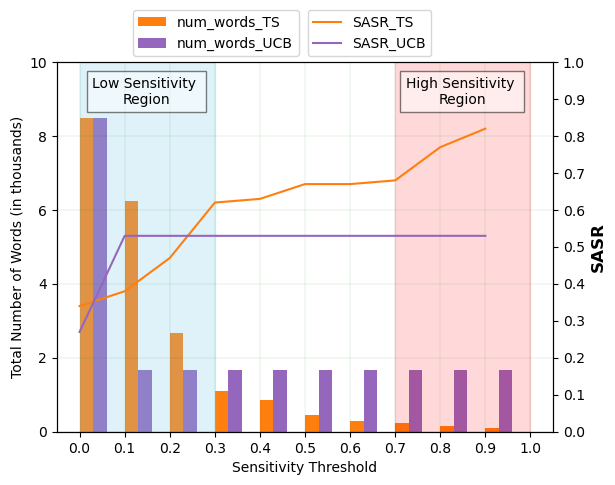

In [311]:
import matplotlib.pyplot as plt
import numpy as np
#'num_words': [6250, 2684, 1094, 855, 464, 293, 240, 165, 104]
# Data
data = {
    'SASR_TS': [0.34, 0.38, 0.47, 0.62, 0.63, 0.67, 0.67, 0.68, 0.77, 0.82],
    'num_words_TS': [8.49, 6.25, 2.684, 1.094, 0.855, 0.464, 0.293, 0.240, 0.165, 0.104],
    'SASR_UCB': [0.27, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53],
    'num_words_UCB': [8.49, 1.66, 1.66, 1.66, 1.66, 1.66, 1.66, 1.66, 1.66, 1.66],
    'Threshold': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
}

# Plotting
fig, ax1 = plt.subplots()

ax1.set_xlabel('Sensitivity Threshold', fontsize=10)
ax1.set_ylabel('Total Number of Words (in thousands)', fontsize=10)
ax1.bar(np.array(data['Threshold']), data['num_words_TS'], color='tab:orange', 
        label='num_words_TS', width=0.03, align="edge")
ax1.bar(np.array(data['Threshold'])+0.03, data['num_words_UCB'], color='tab:purple', 
        label='num_words_UCB', width=0.03, align="edge")
ax1.tick_params(axis='y')
ax1.set_ylim(0, 10)
ax1.legend(loc='upper center', fontsize=10, bbox_to_anchor=(0.32, 1.16))

ax2 = ax1.twinx()
ax2.set_ylabel('SASR', fontsize=12, fontweight='bold')
#ax1.set_ylabel('Label', color='color', fontsize=size, fontweight='bold')
ax2.plot(data['Threshold'], data['SASR_TS'], color='tab:orange', label='SASR_TS')
ax2.plot(data['Threshold'], data['SASR_UCB'], color='tab:purple', label='SASR_UCB')
ax2.tick_params(axis='y')
ax2.set_ylim(0, 1.0)
ax2.legend(loc='upper center', fontsize=10, bbox_to_anchor=(0.63, 1.16))
ax2.yaxis.set_major_locator(plt.MultipleLocator(0.1))

# Showing the plot
ax1.grid(color='g', linestyle='-', linewidth=0.08)
ax1.axvspan(0.00, 0.30, color='skyblue', alpha=0.25)
ax1.axvspan(0.70, 1.0, color='red', alpha=0.15)
# ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 0.90))

plt.yticks([i/10 for i in range(0, 11, 1)])
plt.xticks([i/10 for i in range(0, 11, 1)], fontsize=10)
plt.text(0.148, 0.92, 'Low Sensitivity \nRegion', fontsize=10, bbox=dict(facecolor='white', alpha=0.5), verticalalignment='center', horizontalalignment='center')
plt.text(0.848, 0.92, 'High Sensitivity \nRegion', fontsize=10, bbox=dict(facecolor='white', alpha=0.5), verticalalignment='center', horizontalalignment='center')
plt.show()

In [413]:
import pandas as pd
from tqdm import tqdm
import json

In [417]:
df = pd.read_csv('../data/dataset_mhate/english/new/valid.csv')

In [418]:
datas = [eval(line) for line in open('../data/dataset_mhate/english/new/xlmr_reward_withoutgold_mbert_eng.json')]

In [419]:
for data in tqdm(datas):
    samples = data['meta']['samples']
    for sample in samples:
        idx = sample[0]
        gt = int(df.iloc[idx]['label'])
        sample[2] = [gt, sample[2]]

    with open('../data/dataset_mhate/english/new/xlmr_reward_withoutgold_mbert_eng_updated.json','a') as f:
        json.dump(data, f)
        f.write('\n')

100%|██████████████████████████████████████████████████████████████████████████████████████████| 7061/7061 [00:01<00:00, 4975.95it/s]


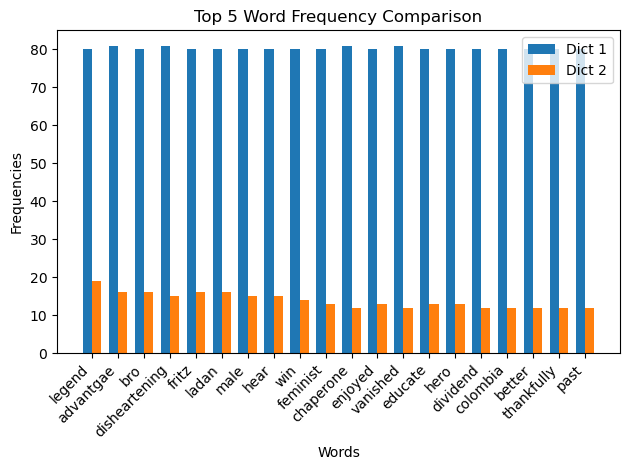

In [274]:
import matplotlib.pyplot as plt
import numpy as np

# Sample dictionaries
dict1 = json.load(open('../experiments_new/ucb_binary_cl_200k/word_frequency.json','r'))
dict2 = json.load(open('../experiments_till_3108/thompson_01_eg_binary_cl_1000_200k/word_frequency.json','r'))

# Select top N words based on combined frequency
top_n = 20
all_words = list(set(dict1.keys()).union(set(dict2.keys())))
all_words.sort(key=lambda word: dict1.get(word, 0) + dict2.get(word, 0), reverse=True)
top_words = all_words[80:100]

# Get frequencies
freq1 = [dict1.get(word, 0) for word in top_words]
freq2 = [dict2.get(word, 0) for word in top_words]

# Plotting
x = np.arange(len(top_words))
width = 0.35

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, freq1, width, label='Dict 1')
bars2 = ax.bar(x + width/2, freq2, width, label='Dict 2')

ax.set_xlabel('Words')
ax.set_ylabel('Frequencies')
ax.set_title('Top 5 Word Frequency Comparison')
ax.set_xticks(x)
ax.set_xticklabels(top_words, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

In [269]:
freq1

[80, 80, 80, 80, 81, 81, 81, 80, 80, 80]

In [270]:
top_words

['christian',
 'toiletries',
 'dislike',
 'hanks',
 '#imaginedragons',
 'egreat',
 'algeria',
 '#notimpressed',
 'wasn',
 'regret']

In [271]:
freq2

[12461, 12270, 11906, 9723, 9538, 9340, 9301, 9264, 7814, 7525]

In [312]:
import pandas as pd
from tqdm import tqdm
import json

In [393]:
lang = "hindi"

In [394]:
df = pd.read_csv(f'../data/dataset_xnli/{lang}/{lang}_test.csv')

In [395]:
datas = [eval(line) for line in open(f'../data/dataset_xnli/XNLI/mab_data/{lang}/test/deberta_rewards_gold.json')]

In [396]:
for data in tqdm(datas):
    samples = data['meta']['samples']
    for sample in samples:
        idx = sample[0]
        gt = df.iloc[idx]['gold_label']
        if(gt=="entailment"):
            gt_label = 0
        elif(gt=="neutral"):
            gt_label = 1
        else:
            gt_label = 2
        sample[3] = [gt_label, sample[3]]

    with open(f'../data/dataset_xnli/XNLI/mab_data/{lang}/test/deberta_rewards_gold_updated.json','a') as f:
        json.dump(data, f)
        f.write('\n')

100%|██████████████████████████████████████████████████████████████████████████████████████████| 9484/9484 [00:02<00:00, 3438.60it/s]


In [437]:
datas = [eval(line) for line in open('../data/dataset_mhate/english/new/xlmr_reward_withoutgold_gpt_eng.json','r')]

In [438]:
for data in tqdm(datas):
    flag=False
    samples = data['meta']['samples']
    for sample in samples:
        if(sample[1] == []):
            flag=True
            break
        else:
            sample[2] = [sample[3], sample[2]]
            del sample[3]
    if(flag==True):
        continue
    with open('../data/dataset_mhate/english/new/xlmr_reward_withoutgold_gpt_eng_updated.json','a') as f:
        json.dump(data, f)
        f.write('\n')

100%|█████████████████████████████████████████████████████████████████████████████████████████| 7061/7061 [00:00<00:00, 16909.81it/s]


In [439]:
datas = [eval(line) for line in open('../data/dataset_mhate/english/new/xlmr_reward_withoutgold_gpt_eng_updated.json','r')]

In [440]:
for data in tqdm(datas):
    samples = data['meta']['samples']
    for sample in samples:
        if(len(sample[2])==0):
            print(sample)

100%|████████████████████████████████████████████████████████████████████████████████████████| 7027/7027 [00:00<00:00, 581523.87it/s]


In [441]:
import json

In [467]:
lang = 'spanish'
rewards = [eval(line) for line in open(f'../data/dataset_xnli/XNLI/mab_data/{lang}/test/deberta_rewards_gold.json','r')]
df = pd.read_csv(f'../data/dataset_xnli/{lang}/{lang}_test.csv')
arms = len(rewards)
edges = 0
for reward in rewards:
    num_edges = len(reward['meta']['samples'])
    edges+=num_edges

print(f'Number of sentences: {len(df)}')
print(f'Number of arms: {arms}')
print(f'Number of edges: {edges}')

Number of sentences: 5010
Number of arms: 11994
Number of edges: 69166


In [472]:
# data/checklist/checklist_all_types_1000
# arms_MLM_roberta_base_uncased_validation_preds.json
# checklist_all_types_1000.csv

rewards = [eval(line) for line in open(f'../data/dataset_sst/arms_MLM_xlmr_validation_preds.json','r')]
df = pd.read_csv(f'../data/dataset_sst/validation.csv')
arms = len(rewards)
edges = 0
for reward in rewards:
    num_edges = len(reward['meta']['samples'])
    edges+=num_edges

print(f'Number of sentences: {len(df)}')
print(f'Number of arms: {arms}')
print(f'Number of edges: {edges}')

Number of sentences: 872
Number of arms: 4088
Number of edges: 8041


In [480]:
# data/checklist/checklist_all_types_1000
# arms_MLM_roberta_base_uncased_validation_preds.json
# checklist_all_types_1000.csv
from tqdm import tqdm

rewards = [eval(line) for line in open(f'../data/dataset_sst/arms_MLM_xlmr_validation_preds_llama.json','r')]
df = pd.read_csv(f'../data/dataset_sst/validation.csv')
arms = len(rewards)
edges = 0
df_preds = pd.DataFrame(columns=['idx','pred'])
for reward in tqdm(rewards):
    samples = reward['meta']['samples']
    for sample in samples:
        df_preds = df_preds._append({'idx':sample[0], 'pred':sample[4][0]}, ignore_index=True)
        #print(df_preds)
    edges+=num_edges

print(f'Number of sentences: {len(df)}')
print(f'Number of arms: {arms}')
print(f'Number of edges: {edges}')

  6%|█████▋                                                                                      | 256/4117 [00:00<00:04, 782.32it/s]

  idx pred
0   1    0
  idx pred
0   1    0
1   1    0
  idx pred
0   1    0
1   1    0
2   2    1
  idx pred
0   1    0
1   1    0
2   2    1
3   2    1
  idx pred
0   1    0
1   1    0
2   2    1
3   2    1
4   2    1
  idx pred
0   1    0
1   1    0
2   2    1
3   2    1
4   2    1
5   2    1
  idx pred
0   1    0
1   1    0
2   2    1
3   2    1
4   2    1
5   2    1
6   3    1
  idx pred
0   1    0
1   1    0
2   2    1
3   2    1
4   2    1
5   2    1
6   3    1
7   3    1
  idx pred
0   1    0
1   1    0
2   2    1
3   2    1
4   2    1
5   2    1
6   3    1
7   3    1
8   3    1
  idx pred
0   1    0
1   1    0
2   2    1
3   2    1
4   2    1
5   2    1
6   3    1
7   3    1
8   3    1
9   3    1
   idx pred
0    1    0
1    1    0
2    2    1
3    2    1
4    2    1
5    2    1
6    3    1
7    3    1
8    3    1
9    3    1
10   5    1
   idx pred
0    1    0
1    1    0
2    2    1
3    2    1
4    2    1
5    2    1
6    3    1
7    3    1
8    3    1
9    3    1
10   5   

 12%|██████████▉                                                                                 | 491/4117 [00:00<00:04, 773.61it/s]

    idx pred
0     1    0
1     1    0
2     2    1
3     2    1
4     2    1
..   ..  ...
253  82    0
254  82    0
255  82    0
256  82    0
257  82    0

[258 rows x 2 columns]
    idx pred
0     1    0
1     1    0
2     2    1
3     2    1
4     2    1
..   ..  ...
254  82    0
255  82    0
256  82    0
257  82    0
258  83    1

[259 rows x 2 columns]
    idx pred
0     1    0
1     1    0
2     2    1
3     2    1
4     2    1
..   ..  ...
255  82    0
256  82    0
257  82    0
258  83    1
259  83    1

[260 rows x 2 columns]
    idx pred
0     1    0
1     1    0
2     2    1
3     2    1
4     2    1
..   ..  ...
256  82    0
257  82    0
258  83    1
259  83    1
260  84    1

[261 rows x 2 columns]
    idx pred
0     1    0
1     1    0
2     2    1
3     2    1
4     2    1
..   ..  ...
257  82    0
258  83    1
259  83    1
260  84    1
261  84    1

[262 rows x 2 columns]
    idx pred
0     1    0
1     1    0
2     2    1
3     2    1
4     2    1
..   ..  ...
258  83  

 20%|█████████████████▉                                                                          | 803/4117 [00:01<00:04, 772.17it/s]

     idx pred
0      1    0
1      1    0
2      2    1
3      2    1
4      2    1
..   ...  ...
568  191    1
569  192    1
570  192    0
571  192    1
572  192    1

[573 rows x 2 columns]
     idx pred
0      1    0
1      1    0
2      2    1
3      2    1
4      2    1
..   ...  ...
569  192    1
570  192    0
571  192    1
572  192    1
573  192    1

[574 rows x 2 columns]
     idx pred
0      1    0
1      1    0
2      2    1
3      2    1
4      2    1
..   ...  ...
570  192    0
571  192    1
572  192    1
573  192    1
574  193    0

[575 rows x 2 columns]
     idx pred
0      1    0
1      1    0
2      2    1
3      2    1
4      2    1
..   ...  ...
571  192    1
572  192    1
573  192    1
574  193    0
575  193    1

[576 rows x 2 columns]
     idx pred
0      1    0
1      1    0
2      2    1
3      2    1
4      2    1
..   ...  ...
572  192    1
573  192    1
574  193    0
575  193    1
576  193    1

[577 rows x 2 columns]
     idx pred
0      1    0
1      1    

 27%|████████████████████████▌                                                                  | 1114/4117 [00:01<00:03, 768.87it/s]

     idx pred
0      1    0
1      1    0
2      2    1
3      2    1
4      2    1
..   ...  ...
881  291    0
882  291    0
883  291    0
884  291    0
885  292    0

[886 rows x 2 columns]
     idx pred
0      1    0
1      1    0
2      2    1
3      2    1
4      2    1
..   ...  ...
882  291    0
883  291    0
884  291    0
885  292    0
886  292    0

[887 rows x 2 columns]
     idx pred
0      1    0
1      1    0
2      2    1
3      2    1
4      2    1
..   ...  ...
883  291    0
884  291    0
885  292    0
886  292    0
887  292    0

[888 rows x 2 columns]
     idx pred
0      1    0
1      1    0
2      2    1
3      2    1
4      2    1
..   ...  ...
884  291    0
885  292    0
886  292    0
887  292    0
888  292    0

[889 rows x 2 columns]
     idx pred
0      1    0
1      1    0
2      2    1
3      2    1
4      2    1
..   ...  ...
885  292    0
886  292    0
887  292    0
888  292    0
889  292    0

[890 rows x 2 columns]
     idx pred
0      1    0
1      1    

 35%|███████████████████████████████▍                                                           | 1422/4117 [00:01<00:03, 762.71it/s]

      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
1193  386    1
1194  386    1
1195  386    1
1196  387    1
1197  387    1

[1198 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
1194  386    1
1195  386    1
1196  387    1
1197  387    1
1198  387    1

[1199 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
1195  386    1
1196  387    1
1197  387    1
1198  387    1
1199  387    1

[1200 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
1196  387    1
1197  387    1
1198  387    1
1199  387    1
1200  388    1

[1201 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
1197  387    1
1198  387    1
1199  387    1
1200  388    1
1201  388    0


 40%|████████████████████████████████████▌                                                      | 1653/4117 [00:02<00:03, 760.53it/s]

      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
1424  458    0
1425  458    1
1426  458    1
1427  458    1
1428  459    1

[1429 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
1425  458    1
1426  458    1
1427  458    1
1428  459    1
1429  459    1

[1430 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
1426  458    1
1427  458    1
1428  459    1
1429  459    1
1430  459    1

[1431 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
1427  458    1
1428  459    1
1429  459    1
1430  459    1
1431  459    1

[1432 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
1428  459    1
1429  459    1
1430  459    1
1431  459    1
1432  459    1


 48%|███████████████████████████████████████████▍                                               | 1963/4117 [00:02<00:02, 766.66it/s]

      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
1735  551    1
1736  551    0
1737  552    0
1738  552    0
1739  552    1

[1740 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
1736  551    0
1737  552    0
1738  552    0
1739  552    1
1740  552    0

[1741 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
1737  552    0
1738  552    0
1739  552    1
1740  552    0
1741  552    0

[1742 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
1738  552    0
1739  552    1
1740  552    0
1741  552    0
1742  553    1

[1743 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
1739  552    1
1740  552    0
1741  552    0
1742  553    1
1743  553    1


 55%|██████████████████████████████████████████████████▏                                        | 2270/4117 [00:02<00:02, 758.57it/s]

      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
2045  663    1
2046  664    1
2047  664    1
2048  664    0
2049  664    1

[2050 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
2046  664    1
2047  664    1
2048  664    0
2049  664    1
2050  664    1

[2051 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
2047  664    1
2048  664    0
2049  664    1
2050  664    1
2051  665    1

[2052 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
2048  664    0
2049  664    1
2050  664    1
2051  665    1
2052  665    1

[2053 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
2049  664    1
2050  664    1
2051  665    1
2052  665    1
2053  666    1


 61%|███████████████████████████████████████████████████████▎                                   | 2500/4117 [00:03<00:02, 757.82it/s]

      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
2276  729    1
2277  729    0
2278  730    0
2279  730    0
2280  730    0

[2281 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
2277  729    0
2278  730    0
2279  730    0
2280  730    0
2281  730    0

[2282 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
2278  730    0
2279  730    0
2280  730    0
2281  730    0
2282  730    0

[2283 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
2279  730    0
2280  730    0
2281  730    0
2282  730    0
2283  730    0

[2284 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
2280  730    0
2281  730    0
2282  730    0
2283  730    0
2284  732    0


 68%|██████████████████████████████████████████████████████████████                             | 2807/4117 [00:03<00:01, 663.79it/s]

      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
2584  813    0
2585  814    0
2586  814    1
2587  814    0
2588  816    1

[2589 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
2585  814    0
2586  814    1
2587  814    0
2588  816    1
2589  816    0

[2590 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
2586  814    1
2587  814    0
2588  816    1
2589  816    0
2590  816    1

[2591 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
2587  814    0
2588  816    1
2589  816    0
2590  816    1
2591  816    1

[2592 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
2588  816    1
2589  816    0
2590  816    1
2591  816    1
2592  816    1


 73%|██████████████████████████████████████████████████████████████████                         | 2989/4117 [00:04<00:02, 455.82it/s]

      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
2851   31    0
2852  381    1
2853   33    0
2854  385    0
2855   33    0

[2856 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
2852  381    1
2853   33    0
2854  385    0
2855   33    0
2856  513    1

[2857 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
2853   33    0
2854  385    0
2855   33    0
2856  513    1
2857   33    0

[2858 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
2854  385    0
2855   33    0
2856  513    1
2857   33    0
2858  798    0

[2859 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
2855   33    0
2856  513    1
2857   33    0
2858  798    0
2859   34    0


 75%|████████████████████████████████████████████████████████████████████▏                      | 3083/4117 [00:04<00:02, 414.18it/s]

      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
3218  166    0
3219  763    1
3220  166    0
3221  202    1
3222  166    1

[3223 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
3219  763    1
3220  166    0
3221  202    1
3222  166    1
3223  643    1

[3224 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
3220  166    0
3221  202    1
3222  166    1
3223  643    1
3224  168    1

[3225 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
3221  202    1
3222  166    1
3223  643    1
3224  168    1
3225  841    1

[3226 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
3222  166    1
3223  643    1
3224  168    1
3225  841    1
3226  171    0


 77%|██████████████████████████████████████████████████████████████████████                     | 3167/4117 [00:04<00:02, 396.68it/s]

      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
3483  420    0
3484  293    1
3485  488    1
3486  294    1
3487  737    1

[3488 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
3484  293    1
3485  488    1
3486  294    1
3487  737    1
3488  295    1

[3489 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
3485  488    1
3486  294    1
3487  737    1
3488  295    1
3489  777    1

[3490 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
3486  294    1
3487  737    1
3488  295    1
3489  777    1
3490  296    0

[3491 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
3487  737    1
3488  295    1
3489  777    1
3490  296    0
3491  750    0


 80%|████████████████████████████████████████████████████████████████████████▋                  | 3287/4117 [00:04<00:02, 384.89it/s]

      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
3658  402    0
3659  654    1
3660  402    0
3661  654    1
3662  404    1

[3663 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
3659  654    1
3660  402    0
3661  654    1
3662  404    1
3663  669    1

[3664 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
3660  402    0
3661  654    1
3662  404    1
3663  669    1
3664  405    0

[3665 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
3661  654    1
3662  404    1
3663  669    1
3664  405    0
3665  778    1

[3666 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
3662  404    1
3663  669    1
3664  405    0
3665  778    1
3666  406    1


 82%|██████████████████████████████████████████████████████████████████████████▍                | 3365/4117 [00:05<00:01, 380.69it/s]

      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
3889  555    0
3890  668    0
3891  555    1
3892  729    1
3893  559    1

[3894 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
3890  668    0
3891  555    1
3892  729    1
3893  559    1
3894  659    0

[3895 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
3891  555    1
3892  729    1
3893  559    1
3894  659    0
3895  560    0

[3896 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
3892  729    1
3893  559    1
3894  659    0
3895  560    0
3896  660    0

[3897 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
3893  559    1
3894  659    0
3895  560    0
3896  660    0
3897  561    1


 84%|████████████████████████████████████████████████████████████████████████████               | 3442/4117 [00:05<00:02, 329.88it/s]

      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
4053  845    0
4054    1    1
4055  274    0
4056  681    0
4057    2    1

[4058 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
4054    1    1
4055  274    0
4056  681    0
4057    2    1
4058  437    0

[4059 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
4055  274    0
4056  681    0
4057    2    1
4058  437    0
4059  678    1

[4060 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
4056  681    0
4057    2    1
4058  437    0
4059  678    1
4060    3    1

[4061 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
4057    2    1
4058  437    0
4059  678    1
4060    3    1
4061  132    1


 86%|██████████████████████████████████████████████████████████████████████████████▏            | 3538/4117 [00:05<00:02, 276.19it/s]

      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
4235   76    0
4236  747    1
4237  841    1
4238   77    1
4239  717    1

[4240 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
4236  747    1
4237  841    1
4238   77    1
4239  717    1
4240  849    1

[4241 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
4237  841    1
4238   77    1
4239  717    1
4240  849    1
4241   79    0

[4242 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
4238   77    1
4239  717    1
4240  849    1
4241   79    0
4242  715    0

[4243 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
4239  717    1
4240  849    1
4241   79    0
4242  715    0
4243  870    0


 87%|███████████████████████████████████████████████████████████████████████████████▍           | 3594/4117 [00:06<00:02, 259.59it/s]

      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
4457  295    0
4458  177    0
4459  193    1
4460  406    1
4461  177    0

[4462 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
4458  177    0
4459  193    1
4460  406    1
4461  177    0
4462  295    1

[4463 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
4459  193    1
4460  406    1
4461  177    0
4462  295    1
4463  847    1

[4464 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
4460  406    1
4461  177    0
4462  295    1
4463  847    1
4464  178    0

[4465 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
4461  177    0
4462  295    1
4463  847    1
4464  178    0
4465  301    0


 89%|█████████████████████████████████████████████████████████████████████████████████▏         | 3673/4117 [00:06<00:01, 252.51it/s]

      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
4706  708    1
4707  771    0
4708  326    1
4709  653    0
4710  714    1

[4711 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
4707  771    0
4708  326    1
4709  653    0
4710  714    1
4711  329    0

[4712 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
4708  326    1
4709  653    0
4710  714    1
4711  329    0
4712  364    0

[4713 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
4709  653    0
4710  714    1
4711  329    0
4712  364    0
4713  702    0

[4714 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
4710  714    1
4711  329    0
4712  364    0
4713  702    0
4714  331    1


 91%|██████████████████████████████████████████████████████████████████████████████████▊        | 3747/4117 [00:06<00:01, 212.78it/s]

      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
4870  796    1
4871  523    1
4872  532    1
4873  560    0
4874  524    1

[4875 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
4871  523    1
4872  532    1
4873  560    0
4874  524    1
4875  671    1

[4876 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
4872  532    1
4873  560    0
4874  524    1
4875  671    1
4876  851    0

[4877 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
4873  560    0
4874  524    1
4875  671    1
4876  851    0
4877  529    0

[4878 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
4874  524    1
4875  671    1
4876  851    0
4877  529    0
4878  662    0


 93%|████████████████████████████████████████████████████████████████████████████████████▏      | 3811/4117 [00:07<00:01, 192.79it/s]

      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
5152  103    1
5153  415    1
5154  427    1
5155  480    1
5156  104    0

[5157 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
5153  415    1
5154  427    1
5155  480    1
5156  104    0
5157  313    1

[5158 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
5154  427    1
5155  480    1
5156  104    0
5157  313    1
5158  613    1

[5159 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
5155  480    1
5156  104    0
5157  313    1
5158  613    1
5159  622    1

[5160 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
5156  104    0
5157  313    1
5158  613    1
5159  622    1
5160  104    0


 94%|█████████████████████████████████████████████████████████████████████████████████████      | 3850/4117 [00:07<00:01, 171.37it/s]

      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
5415  429    0
5416  470    1
5417  616    1
5418  633    1
5419  447    0

[5420 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
5416  470    1
5417  616    1
5418  633    1
5419  447    0
5420  477    0

[5421 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
5417  616    1
5418  633    1
5419  447    0
5420  477    0
5421  657    0

[5422 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
5418  633    1
5419  447    0
5420  477    0
5421  657    0
5422  669    1

[5423 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
5419  447    0
5420  477    0
5421  657    0
5422  669    1
5423  451    1


 94%|█████████████████████████████████████████████████████████████████████████████████████▊     | 3885/4117 [00:07<00:01, 159.77it/s]

      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
5675  437    0
5676  863    0
5677  190    0
5678  483    0
5679  496    1

[5680 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
5676  863    0
5677  190    0
5678  483    0
5679  496    1
5680  551    0

[5681 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
5677  190    0
5678  483    0
5679  496    1
5680  551    0
5681  770    0

[5682 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
5678  483    0
5679  496    1
5680  551    0
5681  770    0
5682  191    1

[5683 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
5679  496    1
5680  551    0
5681  770    0
5682  191    1
5683  316    1


 95%|██████████████████████████████████████████████████████████████████████████████████████▌    | 3918/4117 [00:07<00:01, 141.87it/s]

      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
5846   25    0
5847  156    1
5848  392    0
5849  579    1
5850  596    0

[5851 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
5847  156    1
5848  392    0
5849  579    1
5850  596    0
5851  688    0

[5852 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
5848  392    0
5849  579    1
5850  596    0
5851  688    0
5852   32    1

[5853 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
5849  579    1
5850  596    0
5851  688    0
5852   32    1
5853  625    1

[5854 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
5850  596    0
5851  688    0
5852   32    1
5853  625    1
5854  658    1


 96%|███████████████████████████████████████████████████████████████████████████████████████▏   | 3947/4117 [00:08<00:01, 131.79it/s]

      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
6014  146    1
6015  222    1
6016  557    1
6017  630    1
6018  794    1

[6019 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
6015  222    1
6016  557    1
6017  630    1
6018  794    1
6019  817    1

[6020 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
6016  557    1
6017  630    1
6018  794    1
6019  817    1
6020  174    1

[6021 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
6017  630    1
6018  794    1
6019  817    1
6020  174    1
6021  180    0

[6022 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
6018  794    1
6019  817    1
6020  174    1
6021  180    0
6022  183    1


 96%|███████████████████████████████████████████████████████████████████████████████████████▌   | 3961/4117 [00:08<00:01, 122.23it/s]

      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
6181  347    0
6182  413    1
6183  604    0
6184  753    1
6185   68    1

[6186 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
6182  413    1
6183  604    0
6184  753    1
6185   68    1
6186  108    0

[6187 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
6183  604    0
6184  753    1
6185   68    1
6186  108    0
6187  146    0

[6188 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
6184  753    1
6185   68    1
6186  108    0
6187  146    0
6188  617    1

[6189 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
6185   68    1
6186  108    0
6187  146    0
6188  617    1
6189  689    0


 97%|████████████████████████████████████████████████████████████████████████████████████████   | 3986/4117 [00:08<00:01, 109.67it/s]

      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
6337  597    0
6338  686    1
6339  805    0
6340  833    0
6341  570    1

[6342 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
6338  686    1
6339  805    0
6340  833    0
6341  570    1
6342  594    1

[6343 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
6339  805    0
6340  833    0
6341  570    1
6342  594    1
6343  603    1

[6344 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
6340  833    0
6341  570    1
6342  594    1
6343  603    1
6344  726    1

[6345 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
6341  570    1
6342  594    1
6343  603    1
6344  726    1
6345  766    1


 97%|█████████████████████████████████████████████████████████████████████████████████████████▌  | 4009/4117 [00:08<00:01, 96.31it/s]

      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
6494  254    0
6495  365    1
6496  368    0
6497  398    1
6498  461    1

[6499 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
6495  365    1
6496  368    0
6497  398    1
6498  461    1
6499  844    0

[6500 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
6496  368    0
6497  398    1
6498  461    1
6499  844    0
6500  844    0

[6501 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
6497  398    1
6498  461    1
6499  844    0
6500  844    0
6501  106    1

[6502 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
6498  461    1
6499  844    0
6500  844    0
6501  106    1
6502  566    0


 98%|█████████████████████████████████████████████████████████████████████████████████████████▊  | 4019/4117 [00:08<00:01, 90.95it/s]

      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
6649  530    1
6650  537    1
6651  809    1
6652  817    1
6653   56    0

[6654 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
6650  537    1
6651  809    1
6652  817    1
6653   56    0
6654  133    0

[6655 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
6651  809    1
6652  817    1
6653   56    0
6654  133    0
6655  317    0

[6656 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
6652  817    1
6653   56    0
6654  133    0
6655  317    0
6656  352    1

[6657 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
6653   56    0
6654  133    0
6655  317    0
6656  352    1
6657  492    1


 98%|██████████████████████████████████████████████████████████████████████████████████████████▏ | 4038/4117 [00:09<00:00, 79.60it/s]

      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
6805  548    1
6806  595    0
6807  665    1
6808  688    0
6809   58    1

[6810 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
6806  595    0
6807  665    1
6808  688    0
6809   58    1
6810  152    1

[6811 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
6807  665    1
6808  688    0
6809   58    1
6810  152    1
6811  156    1

[6812 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
6808  688    0
6809   58    1
6810  152    1
6811  156    1
6812  168    1

[6813 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
6809   58    1
6810  152    1
6811  156    1
6812  168    1
6813  219    1


 98%|██████████████████████████████████████████████████████████████████████████████████████████▍ | 4047/4117 [00:09<00:00, 75.68it/s]

      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
6968  776    0
6969  804    0
6970   65    0
6971  101    0
6972  169    1

[6973 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
6969  804    0
6970   65    0
6971  101    0
6972  169    1
6973  248    1

[6974 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
6970   65    0
6971  101    0
6972  169    1
6973  248    1
6974  259    1

[6975 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
6971  101    0
6972  169    1
6973  248    1
6974  259    1
6975  265    0

[6976 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
6972  169    1
6973  248    1
6974  259    1
6975  265    0
6976  290    1


 99%|██████████████████████████████████████████████████████████████████████████████████████████▊ | 4063/4117 [00:09<00:00, 67.12it/s]

      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
7128  591    0
7129  720    0
7130  752    0
7131  789    0
7132   85    0

[7133 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
7129  720    0
7130  752    0
7131  789    0
7132   85    0
7133  109    1

[7134 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
7130  752    0
7131  789    0
7132   85    0
7133  109    1
7134  132    1

[7135 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
7131  789    0
7132   85    0
7133  109    1
7134  132    1
7135  155    0

[7136 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
7132   85    0
7133  109    1
7134  132    1
7135  155    0
7136  170    1


 99%|███████████████████████████████████████████████████████████████████████████████████████████ | 4077/4117 [00:09<00:00, 58.34it/s]

      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
7316  829    1
7317   91    0
7318  107    0
7319  269    0
7320  308    0

[7321 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
7317   91    0
7318  107    0
7319  269    0
7320  308    0
7321  334    1

[7322 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
7318  107    0
7319  269    0
7320  308    0
7321  334    1
7322  339    1

[7323 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
7319  269    0
7320  308    0
7321  334    1
7322  339    1
7323  347    0

[7324 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
7320  308    0
7321  334    1
7322  339    1
7323  347    0
7324  464    0


 99%|███████████████████████████████████████████████████████████████████████████████████████████▏| 4083/4117 [00:09<00:00, 53.89it/s]

      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
7475  304    1
7476  371    1
7477  424    1
7478  463    0
7479  479    1

[7480 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
7476  371    1
7477  424    1
7478  463    0
7479  479    1
7480  486    0

[7481 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
7477  424    1
7478  463    0
7479  479    1
7480  486    0
7481  524    1

[7482 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
7478  463    0
7479  479    1
7480  486    0
7481  524    1
7482  590    0

[7483 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
7479  479    1
7480  486    0
7481  524    1
7482  590    0
7483  674    0


 99%|███████████████████████████████████████████████████████████████████████████████████████████▌| 4095/4117 [00:10<00:00, 45.65it/s]

      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
7633  450    1
7634  482    1
7635  508    1
7636  536    0
7637  636    0

[7638 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
7634  482    1
7635  508    1
7636  536    0
7637  636    0
7638  717    1

[7639 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
7635  508    1
7636  536    0
7637  636    0
7638  717    1
7639  779    0

[7640 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
7636  536    0
7637  636    0
7638  717    1
7639  779    0
7640  797    0

[7641 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
7637  636    0
7638  717    1
7639  779    0
7640  797    0
7641  799    1


100%|███████████████████████████████████████████████████████████████████████████████████████████▌| 4100/4117 [00:10<00:00, 43.06it/s]

      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
7790  205    1
7791  755    1
7792  483    0
7793   27    1
7794  173    0

[7795 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
7791  755    1
7792  483    0
7793   27    1
7794  173    0
7795  792    1

[7796 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
7792  483    0
7793   27    1
7794  173    0
7795  792    1
7796  224    1

[7797 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
7793   27    1
7794  173    0
7795  792    1
7796  224    1
7797  314    1

[7798 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
7794  173    0
7795  792    1
7796  224    1
7797  314    1
7798  180    0


100%|███████████████████████████████████████████████████████████████████████████████████████████▊| 4110/4117 [00:10<00:00, 40.00it/s]

      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
7943  258    0
7944  795    0
7945  318    0
7946  523    1
7947  426    1

[7948 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
7944  795    0
7945  318    0
7946  523    1
7947  426    1
7948  264    0

[7949 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
7945  318    0
7946  523    1
7947  426    1
7948  264    0
7949  701    0

[7950 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
7946  523    1
7947  426    1
7948  264    0
7949  701    0
7950  350    0

[7951 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
7947  426    1
7948  264    0
7949  701    0
7950  350    0
7951  196    0


100%|███████████████████████████████████████████████████████████████████████████████████████████| 4117/4117 [00:10<00:00, 377.84it/s]

      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
8099   14    0
8100  857    1
8101  345    1
8102  437    1
8103  840    0

[8104 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
8100  857    1
8101  345    1
8102  437    1
8103  840    0
8104  488    1

[8105 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
8101  345    1
8102  437    1
8103  840    0
8104  488    1
8105  557    1

[8106 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
8102  437    1
8103  840    0
8104  488    1
8105  557    1
8106   84    0

[8107 rows x 2 columns]
      idx pred
0       1    0
1       1    0
2       2    1
3       2    1
4       2    1
...   ...  ...
8103  840    0
8104  488    1
8105  557    1
8106   84    0
8107  695    0


In [483]:
df_preds = df_preds.drop_duplicates()

In [484]:
df_preds

idx pred
0       1    0
2       2    1
6       3    1
10      5    1
13      7    0
...   ...  ...
7890   47    0
7915  858    0
7941  355    1
8056  177    1
8106   84    0

[1214 rows x 2 columns]

In [487]:
df_preds.sort_values(by='idx')

idx pred
2782    0    1
4054    1    1
0       1    0
2       2    1
4933    2    0
...   ...  ...
2771  868    1
6706  868    0
2772  869    0
2773  870    0
2775  871    1

[1214 rows x 2 columns]

In [490]:
df_preds = df_preds.drop_duplicates(subset='idx')

In [491]:
df_preds

idx pred
0       1    0
2       2    1
6       3    1
10      5    1
13      7    0
...   ...  ...
7152  539    1
7419  744    1
7765  203    0
7775  652    0
7781  493    0

[872 rows x 2 columns]

In [492]:
df_preds.to_csv('../data/dataset_sst/sst_preds.csv', index=False)

In [506]:
# data/checklist/checklist_all_types_1000
# arms_MLM_roberta_base_uncased_validation_preds.json
# checklist_all_types_1000.csv
from tqdm import tqdm

rewards = [eval(line) for line in open(f'../data/dataset_sst/arms_MLM_xlmr_validation_preds_gpt.json','r')]
df = pd.read_csv(f'../data/dataset_sst/validation.csv')
arms = len(rewards)
edges = 0
df_preds = pd.DataFrame(columns=['idx','pred'])
for reward in tqdm(rewards):
    samples = reward['meta']['samples']
    for sample in samples:
        mlm_preds = sample[4][0]
        #for pred in mlm_preds:
        if(mlm_preds==-1):
            print(sample)
        #df_preds = df_preds._append({'idx':sample[0], 'pred':sample[4][0]}, ignore_index=True)
        #print(df_preds)
    edges+=num_edges

print(f'Number of sentences: {len(df)}')
print(f'Number of arms: {arms}')
print(f'Number of edges: {edges}')

100%|████████████████████████████████████████████████████████████████████████████████████████| 4117/4117 [00:00<00:00, 965121.26it/s]

[222, ['bill', 'tom', 'jon', 'jim', 'mark', 'adam', 'bob', 'jack', 'peter', 'kate'], ["a psychological thriller with a genuinely spooky premise and an above-average cast, actor bill paxton's directing debut is a creepy slice of gothic rural americana..", "a psychological thriller with a genuinely spooky premise and an above-average cast, actor tom paxton's directing debut is a creepy slice of gothic rural americana..", "a psychological thriller with a genuinely spooky premise and an above-average cast, actor jon paxton's directing debut is a creepy slice of gothic rural americana..", "a psychological thriller with a genuinely spooky premise and an above-average cast, actor jim paxton's directing debut is a creepy slice of gothic rural americana..", "a psychological thriller with a genuinely spooky premise and an above-average cast, actor mark paxton's directing debut is a creepy slice of gothic rural americana..", "a psychological thriller with a genuinely spooky premise and an above-a

In [499]:
df_preds = df_preds.drop_duplicates(subset='idx')

In [500]:
df_preds['idx'].value_counts()

idx
1      1
654    1
639    1
640    1
641    1
      ..
327    1
328    1
329    1
330    1
493    1
Name: count, Length: 872, dtype: int64

In [501]:
df_preds.to_csv('../data/dataset_sst/sst_preds_gpt.csv', index=False)

In [509]:
# data/checklist/checklist_all_types_1000
# arms_MLM_roberta_base_uncased_validation_preds.json
# checklist_all_types_1000.csv
from tqdm import tqdm

rewards = [eval(line) for line in open(f'../data/dataset_sst/arms_MLM_xlmr_validation_preds_llama2_7B.json','r')]
df = pd.read_csv(f'../data/dataset_sst/validation.csv')
arms = len(rewards)
cnt = 0
df_preds = pd.DataFrame(columns=['idx','pred'])
for reward in tqdm(rewards):
    samples = reward['meta']['samples']
    for sample in samples:
        mlm_preds = sample[4][1]
        for pred in mlm_preds:
            if(pred==-1):
                pred=0
        #df_preds = df_preds._append({'idx':sample[0], 'pred':sample[4][0]}, ignore_index=True)
        #print(df_preds)
print(cnt)  

100%|████████████████████████████████████████████████████████████████████████████████████████| 4117/4117 [00:00<00:00, 538026.16it/s]

8


In [ ]:
# data/checklist/checklist_all_types_1000
# arms_MLM_roberta_base_uncased_validation_preds.json
# checklist_all_types_1000.csv
from tqdm import tqdm

rewards = [eval(line) for line in open(f'../data/dataset_sst/arms_MLM_xlmr_validation_preds_llama2_13B.json','r')]
df = pd.read_csv(f'../data/dataset_sst/validation.csv')
arms = len(rewards)
cnt = 0

for reward in tqdm(rewards):
    flag=0
    samples = reward['meta']['samples']
    new_samples = []
    for sample in samples:
        mlm_preds = sample[4][0]
        if(mlm_preds==-1):
            continue
        else:
            new_samples.append(sample)
            
    reward['meta']['samples'] = new_samples 
    if(flag==0):
        with open("arms_MLM_xlmr_validation_preds_llama2_13B_updated.json", "a") as fl:
                json.dump(reward, fl)
                fl.write('\n')
        #df_preds = df_preds._append({'idx':sample[0], 'pred':sample[4][0]}, ignore_index=True)
        #print(df_preds)